created by Claude
saving plot results as a pdf file

Absolutely! I'll modify the code to save the plot as a PDF file. Here's the updated version:Perfect! Now the code will automatically save your plot as a high-quality PDF file. Here are the key changes:

## New Features:

1. **Automatic PDF saving**: The plot is saved as PDF by default
2. **High quality**: 300 DPI resolution for publication-quality figures
3. **Auto-generated filename**: Creates PDF filename based on your data file name
4. **Custom filename option**: You can specify your own PDF filename if needed

## Usage Examples:

**Basic usage (saves PDF automatically):**
```python
data_dict = plot_voltage_sweep_data()
```
This will create: `data_IV_plot.pdf`

**Custom PDF filename:**
```python
data_dict = plot_voltage_sweep_data(pdf_filename="my_measurement_results.pdf")
```

**Don't save PDF (just display):**
```python
data_dict = plot_voltage_sweep_data(save_pdf=False)
```

## Output Files:

- **Main plot**: `data_IV_plot.pdf`
- **3D plot** (if enabled): `data_IVentu-Ventd-0Vsd_tr350_77K_3D_plot.pdf`

## PDF Features:

- **High resolution**: 300 DPI for crisp, publication-ready figures
- **Vector format**: PDF preserves quality at any zoom level
- **Tight bounding box**: No unnecessary white space around the plot
- **Embedded fonts**: Text will display correctly on any system

The PDF will be saved in the same directory as your script, and you'll see a confirmation message when it's saved successfully!

Creating 3D plot with custom view angle...
Data loaded successfully. Shape: (1250, 3)
Current view: Elevation = 45°, Azimuth = 60°
3D plot saved as: I-Vx-Vn_0x09Vp_0Vs_MUXon_50MHz0dBm_2509171522_3D_elev45_azim60.pdf


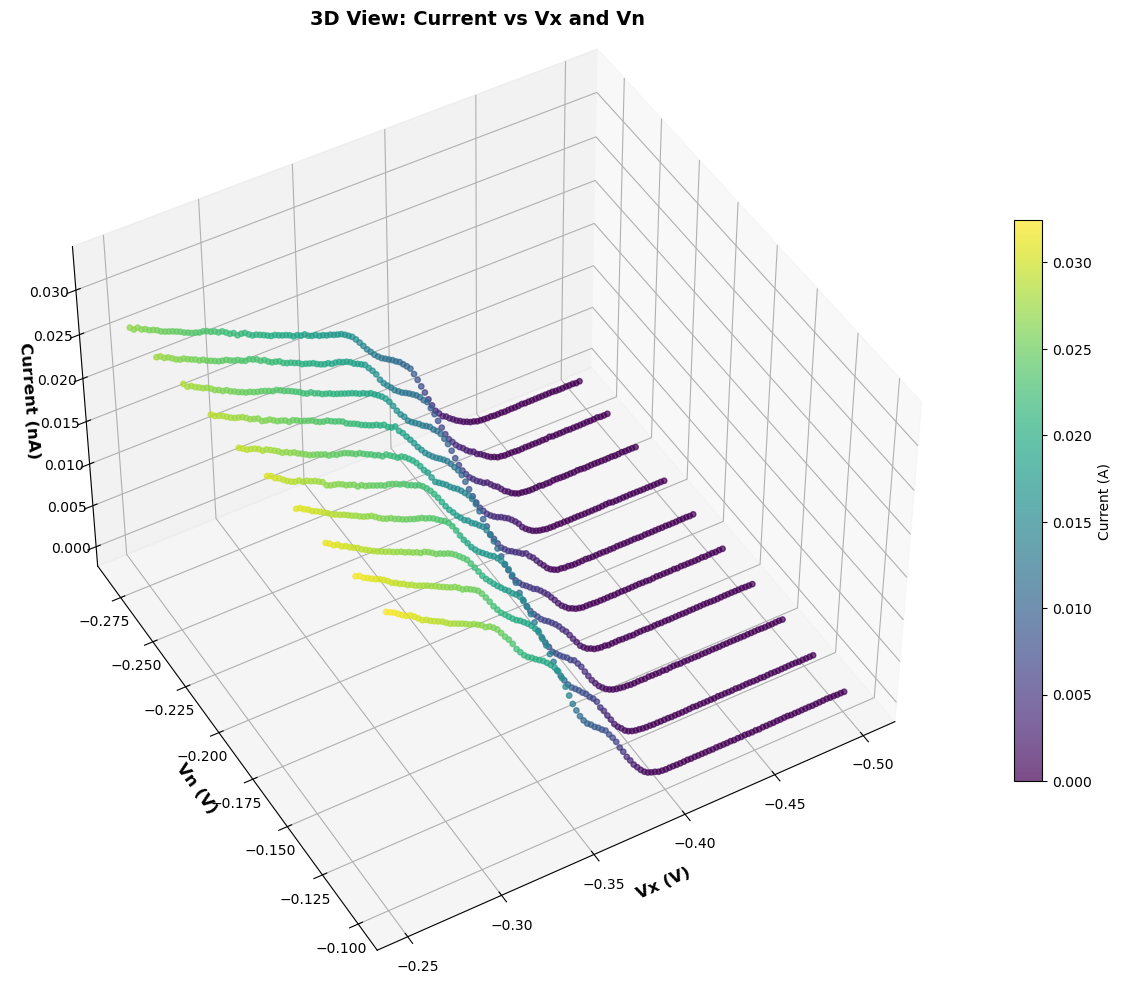


Creating multiple preset views...
Data loaded successfully. Shape: (1250, 3)
Current view: Elevation = 30°, Azimuth = 45°


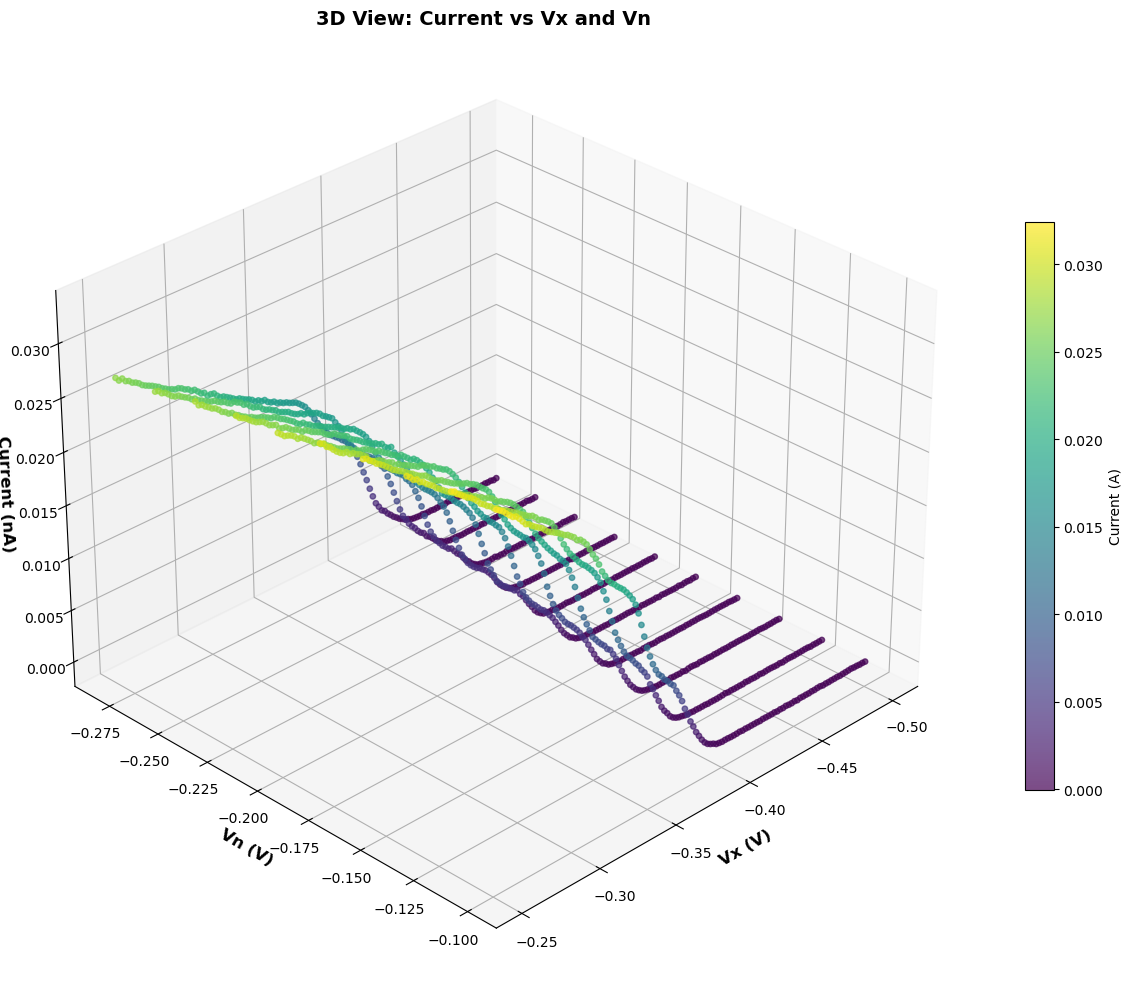

Saved view: I-Vx-Vn_0x09Vp_0Vs_MUXon_50MHz0dBm_2509171522_3D_default.pdf
Saved view: I-Vx-Vn_0x09Vp_0Vs_MUXon_50MHz0dBm_2509171522_3D_high_angle.pdf
Saved view: I-Vx-Vn_0x09Vp_0Vs_MUXon_50MHz0dBm_2509171522_3D_low_angle.pdf
Saved view: I-Vx-Vn_0x09Vp_0Vs_MUXon_50MHz0dBm_2509171522_3D_front_view.pdf
Saved view: I-Vx-Vn_0x09Vp_0Vs_MUXon_50MHz0dBm_2509171522_3D_side_view.pdf
Saved view: I-Vx-Vn_0x09Vp_0Vs_MUXon_50MHz0dBm_2509171522_3D_top_view.pdf
Saved view: I-Vx-Vn_0x09Vp_0Vs_MUXon_50MHz0dBm_2509171522_3D_edge_view.pdf

Creating interactive 3D plot...
Interactive plot created. Click and drag to rotate the view!
Use mouse wheel to zoom in/out


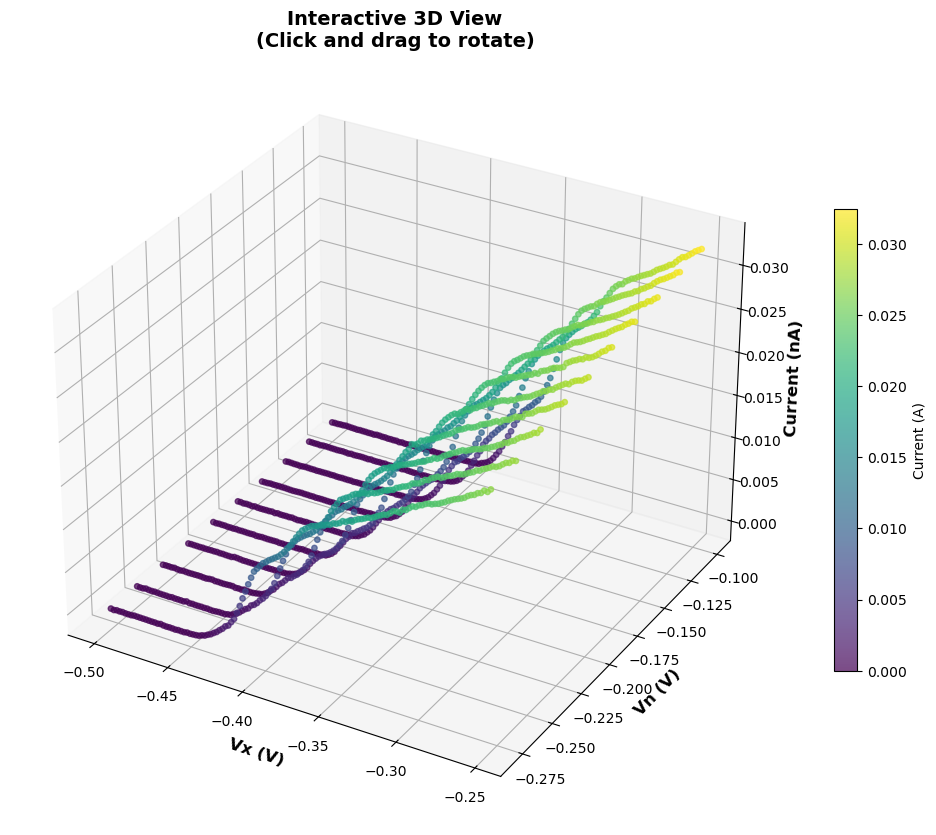

Data loaded successfully. Shape: (1250, 3)
Saved as: I-Vx-Vn_0x09Vp_0Vs_MUXon_50MHz0dBm_2509171522_2D_Contour_advanced.pdf


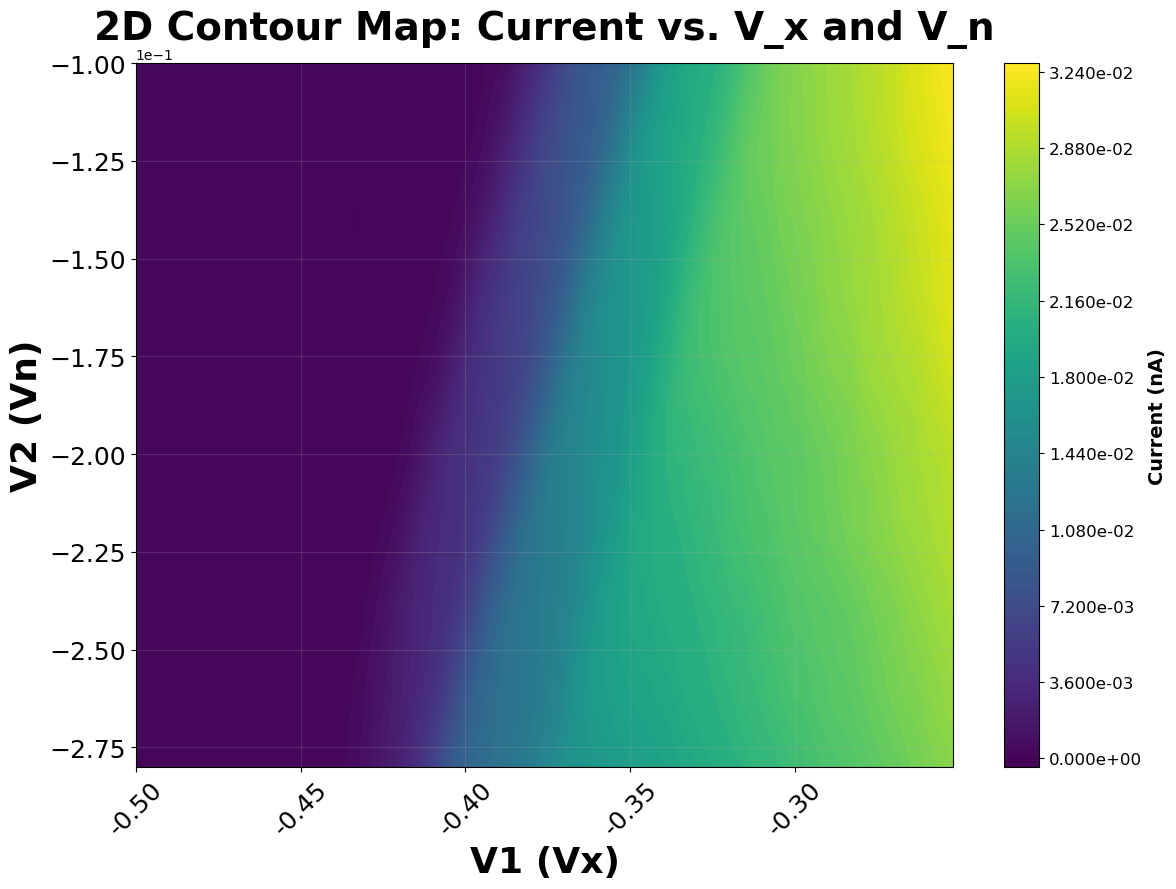

Data loaded successfully for 2D plot. Shape: (1250, 3)
2D contour plot saved as: I-Vx-Vn_0x09Vp_0Vs_MUXon_50MHz0dBm_2509171522_2D_Contour.pdf


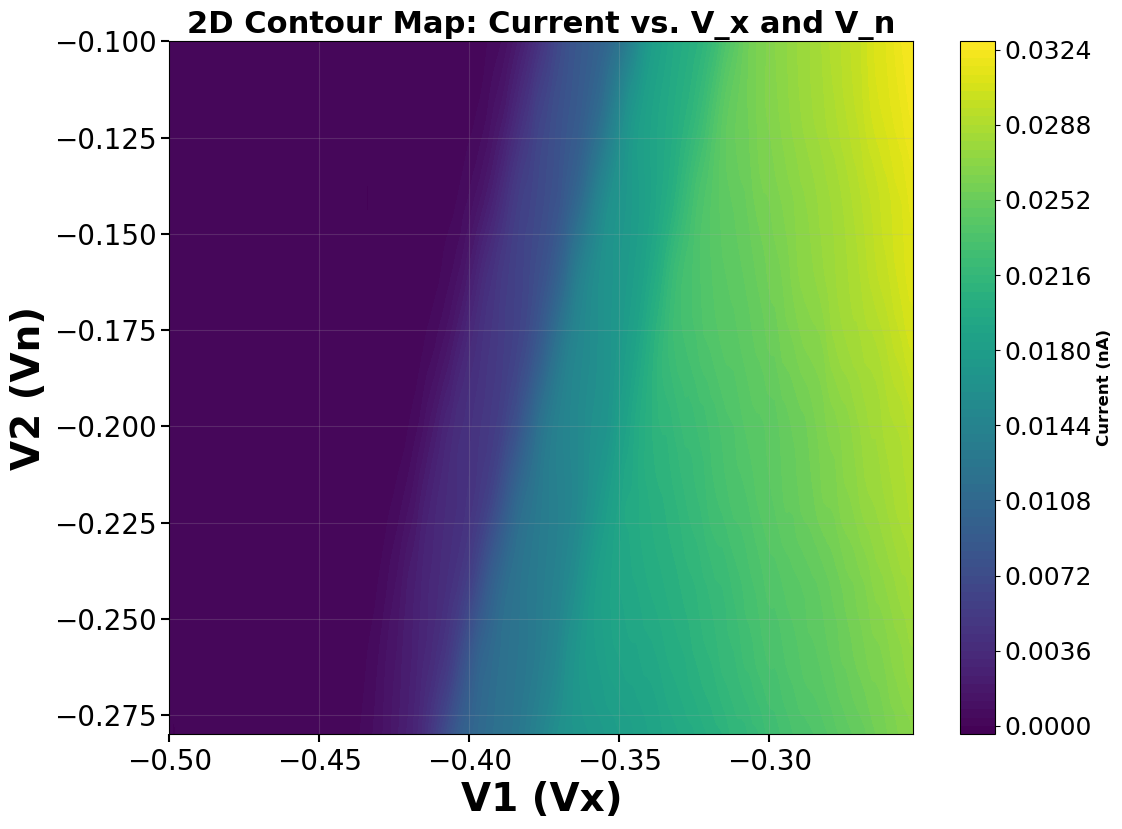

Data loaded successfully. Shape: (1250, 3)
Derivative contour plot saved as: I-Vx-Vn_0x09Vp_0Vs_MUXon_50MHz0dBm_2509171522_dI_dVx_Contour.pdf


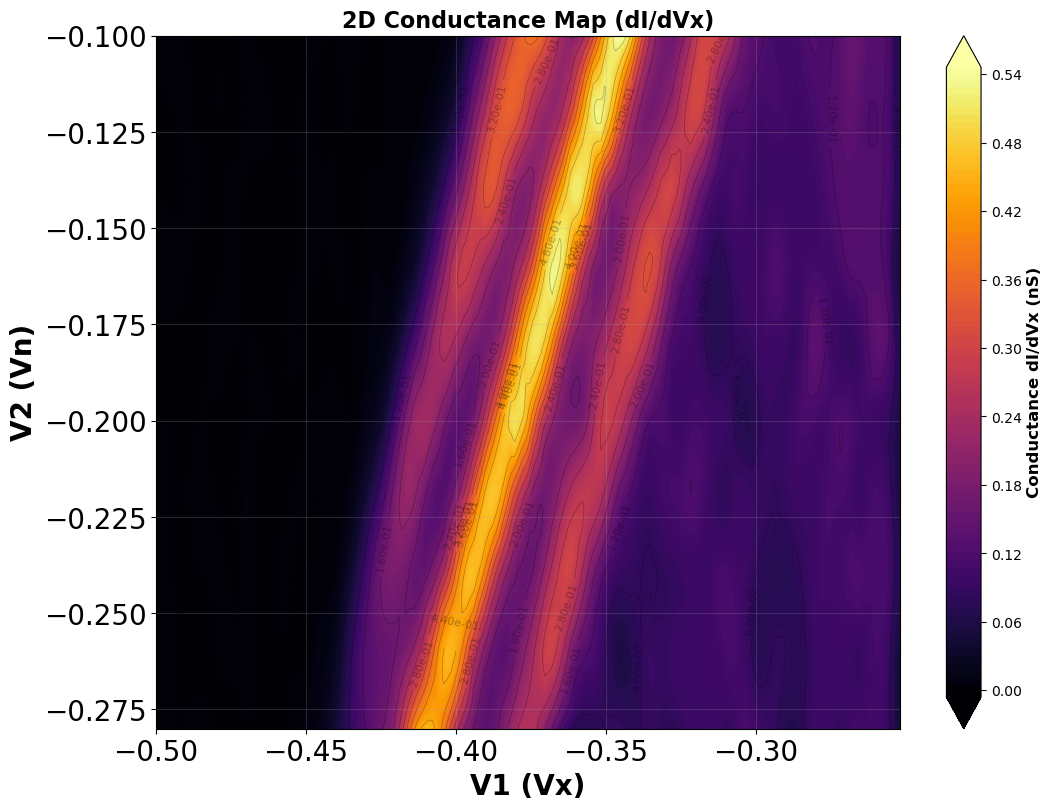

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
from mpl_toolkits.mplot3d import Axes3D # Ensure Axes3D is imported
from scipy.interpolate import griddata
from scipy.ndimage import gaussian_filter1d


def plot_voltage_sweep_data(filename='I-Vx-Vn_0x09Vp_0Vs_MUXon_50MHz0dBm_2509171522.txt', save_pdf=True, pdf_filename=None):
    """
    Plot current vs V1 curves for various V2 values from the saved data file.
    
    Parameters:
    filename (str): Path to the data file
    save_pdf (bool): Whether to save the plot as PDF
    pdf_filename (str): Name of the PDF file (auto-generated if None)
    """
    
    # Read the data from file
    try:
        data = np.loadtxt(filename)
        print(f"Data loaded successfully. Shape: {data.shape}")
    except FileNotFoundError:
        print(f"File {filename} not found. Please check the file path.")
        return
    except Exception as e:
        print(f"Error reading file: {e}")
        return
    
    # Extract columns: V2, V1 (voltage), Current
    V2_values = data[:, 0]
    V1_values = data[:, 1]  
    currents = data[:, 2]
    
    # Group data by V2 values
    data_by_V2 = defaultdict(lambda: {'V1': [], 'current': []})
    
    for v2, v1, current in zip(V2_values, V1_values, currents):
        data_by_V2[v2]['V1'].append(v1)
        data_by_V2[v2]['current'].append(current)
    
    # Sort V2 keys for consistent plotting
    sorted_V2_keys = sorted(data_by_V2.keys())
    
    # Create the plot
    plt.figure(figsize=(12, 8))
    
    # Plot each V2 curve
    colors = plt.cm.viridis(np.linspace(0, 1, len(sorted_V2_keys)))
    
    for i, v2 in enumerate(sorted_V2_keys):
        V1_sorted = np.array(data_by_V2[v2]['V1'])
        current_sorted = np.array(data_by_V2[v2]['current'])
        
        # Sort by V1 to ensure proper line plotting
        sort_indices = np.argsort(V1_sorted)
        V1_sorted = V1_sorted[sort_indices]
        current_sorted = current_sorted[sort_indices]
        
        plt.plot(V1_sorted, current_sorted, '-o', 
                color=colors[i], 
                label=f'V2 = {v2:.2f} V',
                markersize=4,
                linewidth=1.5)
    
    # Formatting
    plt.xlabel('V1 (V)', fontsize=12)
    plt.ylabel('Current (A)', fontsize=12)
    plt.title('Current vs V1 for Various V2 Values', fontsize=14, fontweight='bold')
    plt.grid(True, alpha=0.3)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    
    # Adjust layout to prevent legend cutoff
    plt.tight_layout()
    
    # Save as PDF if requested
    if save_pdf:
        if pdf_filename is None:
            # Auto-generate filename based on data filename
            base_name = filename.replace('.txt', '').replace('.dat', '')
            pdf_filename = f"{base_name}_plot.pdf"
        
        plt.savefig(pdf_filename, format='pdf', dpi=1800, bbox_inches='tight')
        print(f"Plot saved as: {pdf_filename}")
    
    # Show statistics
    print(f"Number of V2 values: {len(sorted_V2_keys)}")
    print(f"V2 range: {min(sorted_V2_keys):.3f} V to {max(sorted_V2_keys):.3f} V")
    print(f"V1 range: {min(V1_values):.3f} V to {max(V1_values):.3f} V")
    print(f"Current range: {min(currents):.6e} A to {max(currents):.6e} A")
    
    plt.show()
    
    return data_by_V2




def plot_3d_surface(filename='I-Vx-Vn_0x09Vp_0Vs_MUXon_50MHz0dBm_2509171522.txt', 
                   save_pdf=False, elevation=30, azimuth=45, save_multiple_views=False):
    """
    Create a 3D surface plot of the data with controllable view angles
    
    Parameters:
    filename (str): Path to data file
    save_pdf (bool): Whether to save the plot as PDF
    elevation (float): Elevation angle in degrees (vertical viewing angle, 0-90)
    azimuth (float): Azimuth angle in degrees (horizontal rotation, 0-360)
    save_multiple_views (bool): Whether to save multiple predefined views
    """

    
    try:
        #data = np.loadtxt(filename, delimiter=',', skiprows=1)
        data = np.loadtxt(filename)
        print(f"Data loaded successfully. Shape: {data.shape}")
    except ValueError:
        try:
            data = np.loadtxt(filename, delimiter=',', comments='#')
            print(f"Data loaded with comments handling. Shape: {data.shape}")
        except:
            try:
                data = np.loadtxt(filename)
                print(f"Data loaded with default settings. Shape: {data.shape}")
            except:
                print("Could not load data for 3D plot")
                return
    except:
        print("Could not load data for 3D plot")
        return
    
    V2_values = data[:, 0]  # Second parameter (e.g., V2, Frequency, etc.)
    V1_values = data[:, 1]  # First parameter (e.g., V1, Voltage)
    currents = data[:, 2]   # Measured current
    
    fig = plt.figure(figsize=(14, 10))
    ax = fig.add_subplot(111, projection='3d')
    
    # Create scatter plot
    scatter = ax.scatter(V1_values, V2_values, currents, 
                        c=currents, cmap='viridis', s=15, alpha=0.7)
    
    # Set labels and title
    ax.set_xlabel('Vx (V)', fontsize=12, fontweight='bold')
    ax.set_ylabel('Vn (V)', fontsize=12, fontweight='bold')
    ax.set_zlabel('Current (nA)', fontsize=12, fontweight='bold')
    ax.set_title('3D View: Current vs Vx and Vn', fontsize=14, fontweight='bold')
    
    # Set the view angle
    ax.view_init(elev=elevation, azim=azimuth)
    
    # Add colorbar
    cbar = plt.colorbar(scatter, shrink=0.6, aspect=20, label='Current (A)')
    cbar.ax.tick_params(labelsize=10)
    
    # Add grid for better visualization
    ax.grid(True, alpha=0.3)
    
    # Print current view angles
    print(f"Current view: Elevation = {elevation}°, Azimuth = {azimuth}°")
    
    if save_pdf:
        base_name = filename.replace('.txt', '').replace('.dat', '')
        pdf_filename = f"{base_name}_3D_elev{elevation}_azim{azimuth}.pdf"
        plt.savefig(pdf_filename, format='pdf', dpi=1800, bbox_inches='tight')
        print(f"3D plot saved as: {pdf_filename}")
    
    plt.tight_layout()
    plt.show()
    
    # Optionally save multiple preset views
    if save_multiple_views:
        save_preset_views(filename, data)

def save_preset_views(filename, data):
    """
    Save multiple preset viewing angles for comprehensive visualization
    """
    # Define preset view angles (elevation, azimuth, description)
    preset_views = [
        (30, 45, "default"),
        (60, 30, "high_angle"),
        (15, 60, "low_angle"),
        (45, 0, "front_view"),
        (45, 90, "side_view"),
        (90, 0, "top_view"),
        (0, 0, "edge_view")
    ]
    
    base_name = filename.replace('.txt', '').replace('.dat', '')
    
    V2_values = data[:, 0]
    V1_values = data[:, 1]
    currents = data[:, 2]
    
    for elev, azim, description in preset_views:
        fig = plt.figure(figsize=(12, 9))
        ax = fig.add_subplot(111, projection='3d')
        
        scatter = ax.scatter(V1_values, V2_values, currents, 
                            c=currents, cmap='viridis', s=15, alpha=0.7)
        
        ax.set_xlabel('Vx (V)', fontsize=12, fontweight='bold')
        ax.set_ylabel('Vn (V)', fontsize=12, fontweight='bold')
        ax.set_zlabel('Current (nA)', fontsize=12, fontweight='bold')
        ax.set_title(f'3D View: {description.replace("_", " ").title()}\n'
                    f'(Elevation: {elev}°, Azimuth: {azim}°)', 
                    fontsize=14, fontweight='bold')
        
        ax.view_init(elev=elev, azim=azim)
        ax.grid(True, alpha=0.3)
        
        plt.colorbar(scatter, shrink=0.6, aspect=20, label='Current (A)')
        
        pdf_filename = f"{base_name}_3D_{description}.pdf"
        plt.savefig(pdf_filename, format='pdf', dpi=1800, bbox_inches='tight')
        plt.close()
        
        print(f"Saved view: {pdf_filename}")

def plot_interactive_3d(filename='I-Vx-Vn_0x09Vp_0Vs_MUXon_50MHz0dBm_2509171522.txt'):
    """
    Create an interactive 3D plot where you can manually adjust the view
    """
    try:
        #data = np.loadtxt(filename, delimiter=',', skiprows=1)
        data = np.loadtxt(filename)
    except:
        try:
            data = np.loadtxt(filename, delimiter=',', comments='#')
        except:
            try:
                data = np.loadtxt(filename)
            except:
                print("Could not load data for interactive 3D plot")
                return
    
    V2_values = data[:, 0]
    V1_values = data[:, 1]
    currents = data[:, 2]
    
    fig = plt.figure(figsize=(14, 10))
    ax = fig.add_subplot(111, projection='3d')
    
    scatter = ax.scatter(V1_values, V2_values, currents, 
                        c=currents, cmap='viridis', s=15, alpha=0.7)
    
    ax.set_xlabel('Vx (V)', fontsize=12, fontweight='bold')
    ax.set_ylabel('Vn (V)', fontsize=12, fontweight='bold')
    ax.set_zlabel('Current (nA)', fontsize=12, fontweight='bold')
    ax.set_title('Interactive 3D View\n(Click and drag to rotate)', 
                fontsize=14, fontweight='bold')
    
    plt.colorbar(scatter, shrink=0.6, aspect=20, label='Current (A)')
    ax.grid(True, alpha=0.3)
    
    print("Interactive plot created. Click and drag to rotate the view!")
    print("Use mouse wheel to zoom in/out")
    
    plt.show()



def plot_2d_contour(filename='I-Vx-Vn_0x09Vp_0Vs_MUXon_50MHz0dBm_2509171522.txt',
                    save_pdf=True, 
                    grid_points=200,
                    # Font size parameters
                    tick_labelsize=14,      # Size of axis tick labels (the numbers)
                    label_fontsize=24,      # Size of axis labels (X and Y titles)
                    title_fontsize=10,      # Size of plot title
                    colorbar_labelsize=12,  # Size of colorbar label
                    colorbar_ticksize=12,   # Size of colorbar tick labels
                    # Additional customization
                    tick_direction='out',   # 'in', 'out', or 'inout'
                    tick_length=6,          # Length of tick marks
                    tick_width=1.5,         # Width of tick marks
                    grid_alpha=0.2,         # Grid transparency
                    dpi=1800):              # DPI for saved PDF
    """
    Creates a 2D contour plot (density map) from 3-column data with customizable font sizes.
    
    Parameters:
    -----------
    filename : str
        Path to the data file
    save_pdf : bool
        Whether to save the plot as a PDF
    grid_points : int
        The resolution of the interpolation grid for a smoother plot
    tick_labelsize : int
        Font size for axis tick labels (the numbers on axes)
    label_fontsize : int
        Font size for axis labels (X and Y axis titles)
    title_fontsize : int
        Font size for plot title
    colorbar_labelsize : int
        Font size for colorbar label
    colorbar_ticksize : int
        Font size for colorbar tick labels
    tick_direction : str
        Direction of tick marks ('in', 'out', or 'inout')
    tick_length : float
        Length of tick marks
    tick_width : float
        Width of tick marks
    grid_alpha : float
        Transparency of grid lines (0-1)
    dpi : int
        Resolution for saved PDF
    """
    
    try:
        # Load data
        data = np.loadtxt(filename)
        print(f"Data loaded successfully for 2D plot. Shape: {data.shape}")
    except Exception as e:
        print(f"Could not load data for 2D plot: {e}")
        return
    
    # Extract data columns
    v2_values = data[:, 0]
    v1_values = data[:, 1]
    currents = data[:, 2]
    
    # Create a regular grid to interpolate onto
    grid_v1 = np.linspace(v1_values.min(), v1_values.max(), grid_points)
    grid_v2 = np.linspace(v2_values.min(), v2_values.max(), grid_points)
    grid_v1, grid_v2 = np.meshgrid(grid_v1, grid_v2)
    
    # Interpolate the scattered data onto the regular grid
    grid_currents = griddata((v1_values, v2_values), currents, 
                            (grid_v1, grid_v2), method='cubic')
    
    # --- Create the Plot ---
    fig, ax = plt.subplots(figsize=(12, 9))
    
    # Create the filled contour plot (density map)
    contour = ax.contourf(grid_v1, grid_v2, grid_currents, 
                          levels=100, cmap='viridis')
    
    # Customize axis tick labels (the numbers on the axes)
    ax.tick_params(axis='x', labelsize=tick_labelsize, 
                   direction=tick_direction, length=tick_length, 
                   width=tick_width)
    ax.tick_params(axis='y', labelsize=tick_labelsize,
                   direction=tick_direction, length=tick_length,
                   width=tick_width)
    
    # Add a color bar with customized font sizes
    cbar = plt.colorbar(contour, ax=ax)
    cbar.set_label('Current (nA)', fontsize=colorbar_labelsize, fontweight='bold')
    cbar.ax.tick_params(labelsize=colorbar_ticksize)
    
    # Add labels and title with customized font sizes
    ax.set_xlabel('V1 (Vx)', fontsize=label_fontsize, fontweight='bold')
    ax.set_ylabel('V2 (Vn)', fontsize=label_fontsize, fontweight='bold')
    ax.set_title('2D Contour Map: Current vs. V_x and V_n', 
                fontsize=title_fontsize, fontweight='bold')
    
    # Add grid
    ax.grid(True, alpha=grid_alpha)
    
    # Optional: Set specific number format for tick labels
    # Uncomment the lines below if you want scientific notation
    # ax.ticklabel_format(style='scientific', axis='x', scilimits=(0,0))
    # ax.ticklabel_format(style='scientific', axis='y', scilimits=(0,0))
    
    # Save the figure if requested
    if save_pdf:
        base_name = filename.replace('.txt', '').replace('.dat', '')
        pdf_filename = f"{base_name}_2D_Contour.pdf"
        plt.savefig(pdf_filename, format='pdf', dpi=dpi, bbox_inches='tight')
        print(f"2D contour plot saved as: {pdf_filename}")
    
    plt.show()
    
    return fig, ax


def plot_2d_contour_advanced(filename='I-Vx-Vn_0x09Vp_0Vs_MUXon_50MHz0dBm_2509171522.txt',
                            save_pdf=True,
                            grid_points=200,
                            # Font parameters
                            font_dict=None,
                            # Number format parameters
                            x_format='auto',  # 'auto', 'scientific', 'plain', or custom format
                            y_format='auto',
                            colorbar_format='%.2e',  # Format string for colorbar
                            x_rotation=0,     # Rotation angle for x-axis labels
                            y_rotation=0):    # Rotation angle for y-axis labels
    """
    Advanced version with more control over number formatting and rotation.
    
    Parameters:
    -----------
    font_dict : dict or None
        Dictionary with font settings. If None, uses defaults.
        Example: {'tick_label': 14, 'axis_label': 24, 'title': 24, 
                  'colorbar_label': 12, 'colorbar_tick': 12}
    x_format, y_format : str
        Format for axis numbers: 'auto', 'scientific', 'plain', or format string
    colorbar_format : str
        Format string for colorbar numbers (e.g., '%.2e' for scientific notation)
    x_rotation, y_rotation : float
        Rotation angle for axis tick labels
    """
    
    # Default font settings
    if font_dict is None:
        font_dict = {
            'tick_label': 14,
            'axis_label': 24,
            'title': 24,
            'colorbar_label': 12,
            'colorbar_tick': 12
        }
    
    try:
        data = np.loadtxt(filename)
        print(f"Data loaded successfully. Shape: {data.shape}")
    except Exception as e:
        print(f"Could not load data: {e}")
        return
    
    v2_values = data[:, 0]
    v1_values = data[:, 1]
    currents = data[:, 2]
    
    # Create grid
    grid_v1 = np.linspace(v1_values.min(), v1_values.max(), grid_points)
    grid_v2 = np.linspace(v2_values.min(), v2_values.max(), grid_points)
    grid_v1, grid_v2 = np.meshgrid(grid_v1, grid_v2)
    
    # Interpolate
    grid_currents = griddata((v1_values, v2_values), currents,
                            (grid_v1, grid_v2), method='cubic')
    
    # Create figure with custom style
    fig, ax = plt.subplots(figsize=(12, 9))
    
    # Create contour plot
    contour = ax.contourf(grid_v1, grid_v2, grid_currents,
                          levels=100, cmap='viridis')
    
    # Format axis numbers
    if x_format == 'scientific':
        ax.ticklabel_format(style='scientific', axis='x', scilimits=(0,0))
    elif x_format == 'plain':
        ax.ticklabel_format(style='plain', axis='x')
    elif x_format != 'auto' and isinstance(x_format, str):
        # Custom format using FuncFormatter
        from matplotlib.ticker import FuncFormatter
        ax.xaxis.set_major_formatter(FuncFormatter(lambda x, p: x_format % x))
    
    if y_format == 'scientific':
        ax.ticklabel_format(style='scientific', axis='y', scilimits=(0,0))
    elif y_format == 'plain':
        ax.ticklabel_format(style='plain', axis='y')
    elif y_format != 'auto' and isinstance(y_format, str):
        from matplotlib.ticker import FuncFormatter
        ax.yaxis.set_major_formatter(FuncFormatter(lambda y, p: y_format % y))
    
    # Set tick label properties
    ax.tick_params(axis='x', labelsize=font_dict['tick_label'], 
                   rotation=x_rotation)
    ax.tick_params(axis='y', labelsize=font_dict['tick_label'],
                   rotation=y_rotation)
    
    # Colorbar with formatting
    cbar = plt.colorbar(contour, ax=ax, format=colorbar_format)
    cbar.set_label('Current (nA)', fontsize=font_dict['colorbar_label'], 
                   fontweight='bold')
    cbar.ax.tick_params(labelsize=font_dict['colorbar_tick'])
    
    # Labels and title
    ax.set_xlabel('V1 (Vx)', fontsize=font_dict['axis_label'], fontweight='bold')
    ax.set_ylabel('V2 (Vn)', fontsize=font_dict['axis_label'], fontweight='bold')
    ax.set_title('2D Contour Map: Current vs. V_x and V_n',
                fontsize=font_dict['title'], fontweight='bold')
    
    ax.grid(True, alpha=0.2)
    
    # Adjust layout to prevent label cutoff
    plt.tight_layout()
    
    if save_pdf:
        base_name = filename.replace('.txt', '').replace('.dat', '')
        pdf_filename = f"{base_name}_2D_Contour_advanced.pdf"
        plt.savefig(pdf_filename, format='pdf', dpi=1800, bbox_inches='tight')
        print(f"Saved as: {pdf_filename}")
    
    plt.show()
    
    return fig, ax



def plot_2d_derivative_contour(filename='I-Vx-Vn_0x09Vp_0Vs_MUXon_50MHz0dBm_2509171522.txt',
                               derivative_type='dI/dVx',  # 'dI/dVx', 'dI/dVn', 'd2I/dVx2', 'd2I/dVn2', 'both'
                               save_pdf=True,
                               grid_points=200,
                               smoothing_sigma=1.5,
                               # Font size parameters
                               tick_labelsize=14,
                               label_fontsize=20,
                               title_fontsize=16,
                               colorbar_labelsize=12,
                               colorbar_ticksize=10,
                               # Plot customization
                               colormap='inferno',
                               contour_levels=100,
                               show_contour_lines=True,
                               symmetric_colorbar=False):
    """
    Calculates various derivatives and creates 2D contour maps.
    
    Parameters:
    -----------
    filename : str
        Path to the data file
    derivative_type : str
        Type of derivative to calculate:
        - 'dI/dVx': Conductance with respect to Vx
        - 'dI/dVn': Conductance with respect to Vn
        - 'd2I/dVx2': Second derivative with respect to Vx
        - 'd2I/dVn2': Second derivative with respect to Vn
        - 'both': Plot both dI/dVx and dI/dVn side by side
    save_pdf : bool
        Whether to save the plot as PDF
    grid_points : int
        Resolution of interpolation grid
    smoothing_sigma : float
        Standard deviation for Gaussian smoothing
    tick_labelsize : int
        Font size for axis tick labels
    label_fontsize : int
        Font size for axis labels
    title_fontsize : int
        Font size for plot title
    colorbar_labelsize : int
        Font size for colorbar label
    colorbar_ticksize : int
        Font size for colorbar ticks
    colormap : str
        Colormap to use
    contour_levels : int
        Number of contour levels
    show_contour_lines : bool
        Whether to show contour lines on top of filled contours
    symmetric_colorbar : bool
        Whether to make colorbar symmetric around zero
    """
    
    try:
        data = np.loadtxt(filename)
        print(f"Data loaded successfully. Shape: {data.shape}")
    except Exception as e:
        print(f"Could not load data: {e}")
        return
    
    # Extract data columns
    v2_col = data[:, 0]  # Vn values
    v1_col = data[:, 1]  # Vx values
    current_col = data[:, 2]
    
    if derivative_type == 'both':
        # Create two subplots for both derivatives
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))
        
        # Calculate and plot dI/dVx
        grid_v1_1, grid_v2_1, grid_didv1 = calculate_derivative_vx(
            v1_col, v2_col, current_col, grid_points, smoothing_sigma)
        
        plot_single_derivative(ax1, grid_v1_1, grid_v2_1, grid_didv1,
                             'dI/dVx', colormap, contour_levels,
                             show_contour_lines, symmetric_colorbar,
                             tick_labelsize, label_fontsize, title_fontsize,
                             colorbar_labelsize, colorbar_ticksize)
        
        # Calculate and plot dI/dVn
        grid_v1_2, grid_v2_2, grid_didv2 = calculate_derivative_vn(
            v1_col, v2_col, current_col, grid_points, smoothing_sigma)
        
        plot_single_derivative(ax2, grid_v1_2, grid_v2_2, grid_didv2,
                             'dI/dVn', colormap, contour_levels,
                             show_contour_lines, symmetric_colorbar,
                             tick_labelsize, label_fontsize, title_fontsize,
                             colorbar_labelsize, colorbar_ticksize)
        
        plt.tight_layout()
        
    else:
        # Single plot
        fig, ax = plt.subplots(figsize=(12, 9))
        
        if derivative_type == 'dI/dVx':
            grid_v1, grid_v2, grid_deriv = calculate_derivative_vx(
                v1_col, v2_col, current_col, grid_points, smoothing_sigma)
        elif derivative_type == 'dI/dVn':
            grid_v1, grid_v2, grid_deriv = calculate_derivative_vn(
                v1_col, v2_col, current_col, grid_points, smoothing_sigma)
        elif derivative_type == 'd2I/dVx2':
            grid_v1, grid_v2, grid_deriv = calculate_second_derivative_vx(
                v1_col, v2_col, current_col, grid_points, smoothing_sigma)
        elif derivative_type == 'd2I/dVn2':
            grid_v1, grid_v2, grid_deriv = calculate_second_derivative_vn(
                v1_col, v2_col, current_col, grid_points, smoothing_sigma)
        else:
            print(f"Unknown derivative type: {derivative_type}")
            return
        
        plot_single_derivative(ax, grid_v1, grid_v2, grid_deriv,
                             derivative_type, colormap, contour_levels,
                             show_contour_lines, symmetric_colorbar,
                             tick_labelsize, label_fontsize, title_fontsize,
                             colorbar_labelsize, colorbar_ticksize)
    
    # Save if requested
    if save_pdf:
        base_name = filename.replace('.txt', '').replace('.dat', '')
        pdf_filename = f"{base_name}_{derivative_type.replace('/', '_')}_Contour.pdf"
        plt.savefig(pdf_filename, format='pdf', dpi=1800, bbox_inches='tight')
        print(f"Derivative contour plot saved as: {pdf_filename}")
    
    plt.show()
    return fig

def calculate_derivative_vx(v1_col, v2_col, current_col, grid_points, smoothing_sigma):
    """Calculate dI/dVx for each V2 sweep."""
    # Group data by V2 value
    data_by_v2 = defaultdict(list)
    for v2, v1, current in zip(v2_col, v1_col, current_col):
        data_by_v2[v2].append((v1, current))
    
    # Store derivative data
    all_v1 = []
    all_v2 = []
    all_didv1 = []
    
    for v2 in sorted(data_by_v2.keys()):
        points = sorted(data_by_v2[v2])
        v1_sweep = np.array([p[0] for p in points])
        current_sweep = np.array([p[1] for p in points])
        
        if len(v1_sweep) > 2:
            # Smooth and calculate derivative
            current_smooth = gaussian_filter1d(current_sweep, sigma=smoothing_sigma)
            didv1 = np.gradient(current_smooth, v1_sweep)
            
            all_v1.extend(v1_sweep)
            all_v2.extend([v2] * len(v1_sweep))
            all_didv1.extend(didv1)
    
    # Create grid and interpolate
    grid_v1 = np.linspace(min(all_v1), max(all_v1), grid_points)
    grid_v2 = np.linspace(min(all_v2), max(all_v2), grid_points)
    grid_v1, grid_v2 = np.meshgrid(grid_v1, grid_v2)
    
    grid_didv1 = griddata((all_v1, all_v2), all_didv1, 
                          (grid_v1, grid_v2), method='cubic')
    
    return grid_v1, grid_v2, grid_didv1

def calculate_derivative_vn(v1_col, v2_col, current_col, grid_points, smoothing_sigma):
    """Calculate dI/dVn for each V1 value."""
    # Group data by V1 value
    data_by_v1 = defaultdict(list)
    for v2, v1, current in zip(v2_col, v1_col, current_col):
        data_by_v1[v1].append((v2, current))
    
    # Store derivative data
    all_v1 = []
    all_v2 = []
    all_didv2 = []
    
    for v1 in sorted(data_by_v1.keys()):
        points = sorted(data_by_v1[v1])
        v2_sweep = np.array([p[0] for p in points])
        current_sweep = np.array([p[1] for p in points])
        
        if len(v2_sweep) > 2:
            # Smooth and calculate derivative
            current_smooth = gaussian_filter1d(current_sweep, sigma=smoothing_sigma)
            didv2 = np.gradient(current_smooth, v2_sweep)
            
            all_v1.extend([v1] * len(v2_sweep))
            all_v2.extend(v2_sweep)
            all_didv2.extend(didv2)
    
    # Create grid and interpolate
    grid_v1 = np.linspace(min(all_v1), max(all_v1), grid_points)
    grid_v2 = np.linspace(min(all_v2), max(all_v2), grid_points)
    grid_v1, grid_v2 = np.meshgrid(grid_v1, grid_v2)
    
    grid_didv2 = griddata((all_v1, all_v2), all_didv2, 
                          (grid_v1, grid_v2), method='cubic')
    
    return grid_v1, grid_v2, grid_didv2


def calculate_second_derivative_vx(v1_col, v2_col, current_col, grid_points, smoothing_sigma):
    """Calculate d²I/dVx² for each V2 sweep."""
    data_by_v2 = defaultdict(list)
    for v2, v1, current in zip(v2_col, v1_col, current_col):
        data_by_v2[v2].append((v1, current))
    
    all_v1 = []
    all_v2 = []
    all_d2idv1 = []
    
    for v2 in sorted(data_by_v2.keys()):
        points = sorted(data_by_v2[v2])
        v1_sweep = np.array([p[0] for p in points])
        current_sweep = np.array([p[1] for p in points])
        
        if len(v1_sweep) > 3:  # Need at least 4 points for second derivative
            # Smooth and calculate second derivative
            current_smooth = gaussian_filter1d(current_sweep, sigma=smoothing_sigma)
            didv1 = np.gradient(current_smooth, v1_sweep)
            d2idv1 = np.gradient(didv1, v1_sweep)
            
            all_v1.extend(v1_sweep)
            all_v2.extend([v2] * len(v1_sweep))
            all_d2idv1.extend(d2idv1)
    
    # Create grid and interpolate
    grid_v1 = np.linspace(min(all_v1), max(all_v1), grid_points)
    grid_v2 = np.linspace(min(all_v2), max(all_v2), grid_points)
    grid_v1, grid_v2 = np.meshgrid(grid_v1, grid_v2)
    
    grid_d2idv1 = griddata((all_v1, all_v2), all_d2idv1, 
                           (grid_v1, grid_v2), method='cubic')
    
    return grid_v1, grid_v2, grid_d2idv1


def calculate_second_derivative_vn(v1_col, v2_col, current_col, grid_points, smoothing_sigma):
    """Calculate d²I/dVn² for each V1 value."""
    data_by_v1 = defaultdict(list)
    for v2, v1, current in zip(v2_col, v1_col, current_col):
        data_by_v1[v1].append((v2, current))
    
    all_v1 = []
    all_v2 = []
    all_d2idv2 = []
    
    for v1 in sorted(data_by_v1.keys()):
        points = sorted(data_by_v1[v1])
        v2_sweep = np.array([p[0] for p in points])
        current_sweep = np.array([p[1] for p in points])
        
        if len(v2_sweep) > 3:
            # Smooth and calculate second derivative
            current_smooth = gaussian_filter1d(current_sweep, sigma=smoothing_sigma)
            didv2 = np.gradient(current_smooth, v2_sweep)
            d2idv2 = np.gradient(didv2, v2_sweep)
            
            all_v1.extend([v1] * len(v2_sweep))
            all_v2.extend(v2_sweep)
            all_d2idv2.extend(d2idv2)
    
    # Create grid and interpolate
    grid_v1 = np.linspace(min(all_v1), max(all_v1), grid_points)
    grid_v2 = np.linspace(min(all_v2), max(all_v2), grid_points)
    grid_v1, grid_v2 = np.meshgrid(grid_v1, grid_v2)
    
    grid_d2idv2 = griddata((all_v1, all_v2), all_d2idv2, 
                           (grid_v1, grid_v2), method='cubic')
    
    return grid_v1, grid_v2, grid_d2idv2


def plot_single_derivative(ax, grid_v1, grid_v2, grid_data, 
                          derivative_type, colormap, contour_levels,
                          show_contour_lines, symmetric_colorbar,
                          tick_labelsize, label_fontsize, title_fontsize,
                          colorbar_labelsize, colorbar_ticksize):
    """Helper function to plot a single derivative contour."""
    
    # Handle symmetric colorbar if requested
    if symmetric_colorbar:
        vmax = np.nanmax(np.abs(grid_data))
        vmin = -vmax
    else:
        vmin = np.nanmin(grid_data)
        vmax = np.nanmax(grid_data)
    
    # Create filled contour plot
    contour = ax.contourf(grid_v1, grid_v2, grid_data, 
                          levels=contour_levels, cmap=colormap,
                          vmin=vmin, vmax=vmax, extend='both')
    
    # Add contour lines if requested
    if show_contour_lines:
        contour_lines = ax.contour(grid_v1, grid_v2, grid_data,
                                   levels=15, colors='black', 
                                   alpha=0.3, linewidths=0.5)
        ax.clabel(contour_lines, inline=True, fontsize=8, fmt='%.2e')
    
    # Set labels based on derivative type
    if 'dI/dVx' in derivative_type or 'd2I/dVx2' in derivative_type:
        unit = 'nS' if 'd2I' not in derivative_type else 'nS/V'
        label = f'Conductance {derivative_type} ({unit})'
    else:
        unit = 'nS' if 'd2I' not in derivative_type else 'nS/V'
        label = f'Conductance {derivative_type} ({unit})'
    
    # Add colorbar
    cbar = plt.colorbar(contour, ax=ax)
    cbar.set_label(label, fontsize=colorbar_labelsize, fontweight='bold')
    cbar.ax.tick_params(labelsize=colorbar_ticksize)
    
    # Set axis labels and title
    ax.set_xlabel('V1 (Vx)', fontsize=label_fontsize, fontweight='bold')
    ax.set_ylabel('V2 (Vn)', fontsize=label_fontsize, fontweight='bold')
    
    title_map = {
        'dI/dVx': '2D Conductance Map (dI/dVx)',
        'dI/dVn': '2D Conductance Map (dI/dVn)',
        'd2I/dVx2': '2D Second Derivative Map (d²I/dVx²)',
        'd2I/dVn2': '2D Second Derivative Map (d²I/dVn²)'
    }
    ax.set_title(title_map.get(derivative_type, f'2D Derivative Map ({derivative_type})'),
                fontsize=title_fontsize, fontweight='bold')
    
    # Set tick parameters
    ax.tick_params(axis='both', labelsize=tick_labelsize)
    ax.grid(True, alpha=0.2)


def plot_2d_mixed_derivative(filename='I-Vx-Vn_0x09Vp_0Vs_MUXon_50MHz0dBm_2509171522.txt',
                            save_pdf=True,
                            grid_points=200,
                            smoothing_sigma=2.0):
    """
    Calculate and plot the mixed derivative d²I/dVxdVn.
    This shows how the conductance with respect to one voltage changes
    as the other voltage is varied.
    """
    
    try:
        data = np.loadtxt(filename)
        print(f"Data loaded for mixed derivative. Shape: {data.shape}")
    except Exception as e:
        print(f"Could not load data: {e}")
        return
    
    v2_col = data[:, 0]  # Vn
    v1_col = data[:, 1]  # Vx
    current_col = data[:, 2]
    
    # Create regular grid for interpolation
    v1_min, v1_max = v1_col.min(), v1_col.max()
    v2_min, v2_max = v2_col.min(), v2_col.max()
    
    grid_v1 = np.linspace(v1_min, v1_max, grid_points)
    grid_v2 = np.linspace(v2_min, v2_max, grid_points)
    grid_v1_mesh, grid_v2_mesh = np.meshgrid(grid_v1, grid_v2)
    
    # Interpolate current data onto regular grid
    grid_current = griddata((v1_col, v2_col), current_col,
                           (grid_v1_mesh, grid_v2_mesh), method='cubic')
    
    # Apply Gaussian smoothing to reduce noise
    grid_current_smooth = gaussian_filter(grid_current, sigma=smoothing_sigma)
    
    # Calculate mixed derivative using numpy gradient
    # First derivative with respect to Vx
    dI_dVx = np.gradient(grid_current_smooth, grid_v1, axis=1)
    # Second derivative with respect to Vn
    d2I_dVxdVn = np.gradient(dI_dVx, grid_v2, axis=0)
    
    # Create the plot
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))
    
    # Plot dI/dVx
    contour1 = ax1.contourf(grid_v1_mesh, grid_v2_mesh, dI_dVx,
                            levels=100, cmap='coolwarm')
    cbar1 = plt.colorbar(contour1, ax=ax1)
    cbar1.set_label('dI/dVx (nS)', fontsize=12, fontweight='bold')
    ax1.set_xlabel('Vx (V)', fontsize=14, fontweight='bold')
    ax1.set_ylabel('Vn (V)', fontsize=14, fontweight='bold')
    ax1.set_title('Conductance dI/dVx', fontsize=16, fontweight='bold')
    ax1.grid(True, alpha=0.2)
    
    # Plot mixed derivative
    vmax = np.nanmax(np.abs(d2I_dVxdVn))
    contour2 = ax2.contourf(grid_v1_mesh, grid_v2_mesh, d2I_dVxdVn,
                            levels=100, cmap='RdBu_r', vmin=-vmax, vmax=vmax)
    cbar2 = plt.colorbar(contour2, ax=ax2)
    cbar2.set_label('d²I/dVxdVn (nS/V)', fontsize=12, fontweight='bold')
    ax2.set_xlabel('Vx (V)', fontsize=14, fontweight='bold')
    ax2.set_ylabel('Vn (V)', fontsize=14, fontweight='bold')
    ax2.set_title('Mixed Derivative d²I/dVxdVn', fontsize=16, fontweight='bold')
    ax2.grid(True, alpha=0.2)
    
    plt.tight_layout()
    
    if save_pdf:
        base_name = filename.replace('.txt', '').replace('.dat', '')
        pdf_filename = f"{base_name}_mixed_derivative.pdf"
        plt.savefig(pdf_filename, format='pdf', dpi=1800, bbox_inches='tight')
        print(f"Mixed derivative plot saved as: {pdf_filename}")
    
    plt.show()
    return fig


def plot_derivative_comparison(filename='I-Vx-Vn_0x09Vp_0Vs_MUXon_50MHz0dBm_2509171522.txt',
                              save_pdf=True,
                              grid_points=200,
                              smoothing_sigma=1.5):
    """
    Create a comprehensive comparison plot showing:
    - Original current data
    - dI/dVx
    - dI/dVn
    - d²I/dVx²
    """
    
    try:
        data = np.loadtxt(filename)
        print(f"Data loaded for comparison. Shape: {data.shape}")
    except Exception as e:
        print(f"Could not load data: {e}")
        return
    
    v2_col = data[:, 0]
    v1_col = data[:, 1]
    current_col = data[:, 2]
    
    # Create figure with 4 subplots
    fig, axes = plt.subplots(2, 2, figsize=(20, 16))
    
    # Original current data
    grid_v1 = np.linspace(v1_col.min(), v1_col.max(), grid_points)
    grid_v2 = np.linspace(v2_col.min(), v2_col.max(), grid_points)
    grid_v1_mesh, grid_v2_mesh = np.meshgrid(grid_v1, grid_v2)
    grid_current = griddata((v1_col, v2_col), current_col,
                           (grid_v1_mesh, grid_v2_mesh), method='cubic')
    
    contour0 = axes[0,0].contourf(grid_v1_mesh, grid_v2_mesh, grid_current,
                                  levels=100, cmap='viridis')
    plt.colorbar(contour0, ax=axes[0,0], label='Current (nA)')
    axes[0,0].set_title('Original Current Data', fontsize=14, fontweight='bold')
    axes[0,0].set_xlabel('Vx (V)', fontsize=12)
    axes[0,0].set_ylabel('Vn (V)', fontsize=12)
    
    # dI/dVx
    _, _, grid_didvx = calculate_derivative_vx(v1_col, v2_col, current_col, 
                                               grid_points, smoothing_sigma)
    contour1 = axes[0,1].contourf(grid_v1_mesh, grid_v2_mesh, grid_didvx,
                                  levels=100, cmap='inferno')
    plt.colorbar(contour1, ax=axes[0,1], label='dI/dVx (nS)')
    axes[0,1].set_title('Conductance dI/dVx', fontsize=14, fontweight='bold')
    axes[0,1].set_xlabel('Vx (V)', fontsize=12)
    axes[0,1].set_ylabel('Vn (V)', fontsize=12)
    
    # dI/dVn
    _, _, grid_didvn = calculate_derivative_vn(v1_col, v2_col, current_col,
                                               grid_points, smoothing_sigma)
    contour2 = axes[1,0].contourf(grid_v1_mesh, grid_v2_mesh, grid_didvn,
                                  levels=100, cmap='plasma')
    plt.colorbar(contour2, ax=axes[1,0], label='dI/dVn (nS)')
    axes[1,0].set_title('Conductance dI/dVn', fontsize=14, fontweight='bold')
    axes[1,0].set_xlabel('Vx (V)', fontsize=12)
    axes[1,0].set_ylabel('Vn (V)', fontsize=12)
    
    # d²I/dVx²
    _, _, grid_d2idvx2 = calculate_second_derivative_vx(v1_col, v2_col, current_col,
                                                        grid_points, smoothing_sigma)
    vmax = np.nanmax(np.abs(grid_d2idvx2[~np.isnan(grid_d2idvx2)]))
    contour3 = axes[1,1].contourf(grid_v1_mesh, grid_v2_mesh, grid_d2idvx2,
                                  levels=100, cmap='coolwarm', vmin=-vmax, vmax=vmax)
    plt.colorbar(contour3, ax=axes[1,1], label='d²I/dVx² (nS/V)')
    axes[1,1].set_title('Second Derivative d²I/dVx²', fontsize=14, fontweight='bold')
    axes[1,1].set_xlabel('Vx (V)', fontsize=12)
    axes[1,1].set_ylabel('Vn (V)', fontsize=12)
    
    # Add grid to all subplots
    for ax in axes.flat:
        ax.grid(True, alpha=0.2)
    
    plt.tight_layout()
    
    if save_pdf:
        base_name = filename.replace('.txt', '').replace('.dat', '')
        pdf_filename = f"{base_name}_derivative_comparison.pdf"
        plt.savefig(pdf_filename, format='pdf', dpi=1800, bbox_inches='tight')
        print(f"Comparison plot saved as: {pdf_filename}")
    
    plt.show()
    return fig


def analyze_data_statistics(filename='I-Vx-Vn_0x09Vp_0Vs_MUXon_50MHz0dBm_2509171522.txt'):
    """
    Print detailed statistics about the measurement data
    """
    try:
        data = np.loadtxt(filename)
    except:
        print("Could not load data for analysis")
        return
    
    V2_values = data[:, 0]
    V1_values = data[:, 1]
    currents = data[:, 2]
    
    print("=== Data Analysis ===")
    print(f"Total data points: {len(data)}")
    print(f"Unique V2 values: {len(np.unique(V2_values))}")
    print(f"V2 values: {np.unique(V2_values)}")
    print(f"V1 range: {np.min(V1_values):.3f} to {np.max(V1_values):.3f} V")
    print(f"Current statistics:")
    print(f"  Mean: {np.mean(currents):.6e} A")
    print(f"  Std:  {np.std(currents):.6e} A")
    print(f"  Min:  {np.min(currents):.6e} A")
    print(f"  Max:  {np.max(currents):.6e} A")

# if __name__ == "__main__":
#     # Main plotting function - saves PDF by default
#     data_dict = plot_voltage_sweep_data(save_pdf=True)
    
#     # Optional: Show statistics
#     analyze_data_statistics()
    
#     # Optional: Create 3D plot and save as PDF (uncomment if desired)
#     plot_3d_surface(save_pdf=True)
    
#     print("\nPlotting complete! PDF file has been saved.")


# Example usage functions
if __name__ == "__main__":
    filename = 'I-Vx-Vn_0x09Vp_0Vs_MUXon_50MHz0dBm_2509171522.txt'
    
    # Single view with custom angles
    print("Creating 3D plot with custom view angle...")
    plot_3d_surface(filename, elevation=45, azimuth=60, save_pdf=True)
    
    # Multiple preset views
    print("\nCreating multiple preset views...")
    plot_3d_surface(filename, save_multiple_views=True)
    
    # Interactive plot
    print("\nCreating interactive 3D plot...")
    plot_interactive_3d(filename)

    # Example 1: Basic usage with custom tick label size
    # plot_2d_contour(
    #     filename='your_data.txt',
    #     tick_labelsize=16,  # Larger numbers on axes
    #     label_fontsize=20,  # Smaller axis titles
    #     title_fontsize=18,
    #     colorbar_ticksize=14
    # )
    
    # Example 2: Advanced formatting
    plot_2d_contour_advanced(
        filename,
        font_dict={
            'tick_label': 18,      # Size of numbers on axes
            'axis_label': 26,      # Size of X and Y labels
            'title': 28,           # Size of plot title
            'colorbar_label': 14,  # Size of colorbar label
            'colorbar_tick': 12    # Size of colorbar numbers
        },
        x_format='%.2f',          # Show 2 decimal places on x-axis
        y_format='scientific',     # Scientific notation on y-axis
        colorbar_format='%.3e',    # Scientific notation with 3 decimals
        x_rotation=45              # Rotate x-axis labels by 45 degrees
    )
    
    # Example 3: Large fonts for presentation
    plot_2d_contour(
        filename,
        tick_labelsize=20,    # Very large axis numbers
        label_fontsize=28,    # Very large axis labels
        title_fontsize=22,    # Very large title
        colorbar_ticksize=18  # Large colorbar numbers
    )

    # Call the new function to create the conductance map
    plot_2d_derivative_contour(
        filename,
        derivative_type='dI/dVx',
        smoothing_sigma=1.5,
        colormap='inferno',
        tick_labelsize=20
    )